# Q1

In [56]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

In [7]:
data = np.array([[1,8], [1,1], [2,4], [3,3], [4,9], [4,6], [6,4], [7,7], [9,9], [9,1]])

In [21]:
data_labels = np.array(['A','B','C','D','E','F','G','H','I','J'])

In [8]:
data

array([[1, 8],
       [1, 1],
       [2, 4],
       [3, 3],
       [4, 9],
       [4, 6],
       [6, 4],
       [7, 7],
       [9, 9],
       [9, 1]])

In [52]:
# Number of clusters: 3
k = 3 
# Number of datapoints: 10
n = 10

In [34]:
# Initial Seeds
centroids = np.array([[1,1], [3,3], [9,1]])

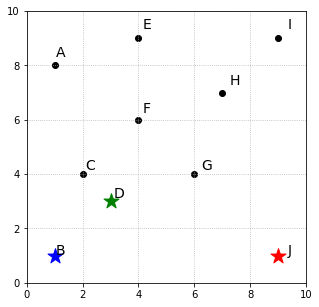

In [79]:
# Plot points
figure = plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], color='black')
colors_map = ['blue', 'green', 'red']
plt.xlim(0, 10)
plt.ylim(0, 10)
for i, text in enumerate(data_labels):
    plt.annotate(text, (data[i,0]*(1.04), data[i,1]*(1.04)), fontsize = 14)
for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', color=colors_map[i], s=250)

plt.grid(which='both', linestyle='dotted')
plt.show()

In [83]:
distances = np.zeros(shape=(n,k))
clusters = np.zeros(k)

new_centroids = np.zeros(centroids.shape)
old_centroids = deepcopy(centroids)
error = np.linalg.norm(new_centroids - old_centroids)
for i in range(k):
    distances[:,i] = np.linalg.norm(data - centroids[i], axis = 1)
clusters = np.argmin(distances, axis = 1)

old_centroids = deepcopy(new_centroids)

# Calculate mean for every cluster and update the center
for i in range(k):
    new_centroids[i] = np.mean(data[clusters == i], axis=0)
error = np.linalg.norm(new_centroids - old_centroids)
    
print('Distances')
distances


Distances


array([[ 7.        ,  5.38516481, 10.63014581],
       [ 0.        ,  2.82842712,  8.        ],
       [ 3.16227766,  1.41421356,  7.61577311],
       [ 2.82842712,  0.        ,  6.32455532],
       [ 8.54400375,  6.08276253,  9.43398113],
       [ 5.83095189,  3.16227766,  7.07106781],
       [ 5.83095189,  3.16227766,  4.24264069],
       [ 8.48528137,  5.65685425,  6.32455532],
       [11.3137085 ,  8.48528137,  8.        ],
       [ 8.        ,  6.32455532,  0.        ]])

In [81]:
# Helper Functions to draw chart:
# Plot points
def scatter_plot(data, centroids):
    figure = plt.figure(figsize=(8,8))
    plt.scatter(data[:,0], data[:,1], color='b')
    colors_map = ['blue', 'green', 'red']
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    for i, text in enumerate(data_labels):
        plt.annotate(text, (data[i,0]*(1.04), data[i,1]*(1.04)), fontsize = 14)
    for i in range(k):
        plt.scatter(centroids[i,0], centroids[i,1], marker='*', color=colors_map[i], s=250)
    for i in range(n):
        plt.scatter(data[i,0], data[i,1],color=colors_map[clusters[i]])
    plt.grid(which='both', linestyle='dotted')
    plt.show() 

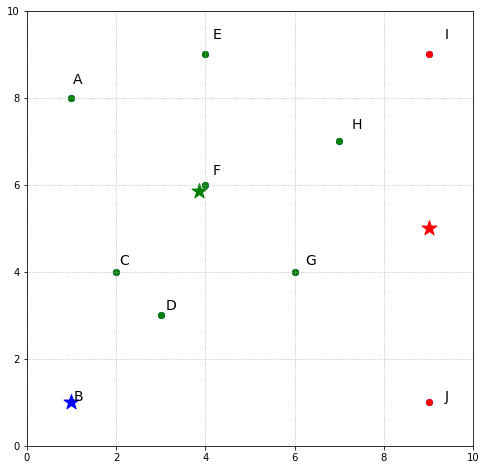

In [82]:
# Plot points
# figure = plt.figure(figsize=(8,8))
# plt.scatter(data[:,0], data[:,1], color='b')
# colors_map = ['blue', 'green', 'red']
# plt.xlim(0, 10)
# plt.ylim(0, 10)
# for i, text in enumerate(data_labels):
#     plt.annotate(text, (data[i,0]*(1.04), data[i,1]*(1.04)), fontsize = 14)
# for i in range(k):
#     plt.scatter(new_centroids[i,0], new_centroids[i,1], marker='*', color=colors_map[i], s=250)
# for i in range(n):
#     plt.scatter(data[i,0], data[i,1],color=colors_map[clusters[i]])
# plt.grid(which='both', linestyle='dotted')
# plt.show() 
scatter_plot(data, new_centroids)

In [ ]:
while !np.array_equal(new_centroids, old_centroids) :
    print('EPOCH : ')
    distances = np.zeros(shape=(n,k))
    clusters = np.zeros(k)

    new_centroids = np.zeros(centroids.shape)
    old_centroids = deepcopy(centroids)
    error = np.linalg.norm(new_centroids - old_centroids)
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centroids[i], axis = 1)
    clusters = np.argmin(distances, axis = 1)

    old_centroids = deepcopy(new_centroids)

    # Calculate mean for every cluster and update the center
    for i in range(k):
        new_centroids[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(new_centroids - old_centroids)
    scatter_plot(data, new_centroids)